#### 시계열 데이터란? 
시간에 순차적으로 관측한 값들의 집합, 예측 모델에서 시간을 변수로 활용한다.

#### 시계열 데이터 분석이란?
과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법으로, 과거의 패턴이 미래에도 지속된다는 데이터의 안정성이 기본적인 가정으로 필요하다. 

#### 시계열 분해법
시계열 데이터를 추세/순환/계절/불규칙 요소로 분해하는 기법이다
- 추세(Trend) : 데이터가 장기적으로 증가하거나 감소하는 것이며, 추세는 꼭 선형적일 필요가 없다.

-순환(Cycle) : 경기변동과 같이 정치,경제,사회적 요인에 의한 변화로, 일정 주기가 없으며 장기적인 변화 현상이다

-계절성(Seasonal) : 주,월,분기,반기 단위 등 특정 시간의 주기로 나타나는 패턴이다

-불규칙요소(Random, Residual) : 설명될 수 없는 돌발적 요인에 의해 일어나는 변화로, 예측 불가능한 임의 변동을 의미한다.
분해법에서는 원래데이터에서 추세,순환,계절성을 뺀 나머지를 불규칙 요소라고 한다.

즉, 시계열 데이터는 추세, 순환, 계절성, 불규칙 요소로 이루어져있으며 이를 식으로 나타내면 다음과 같다. 

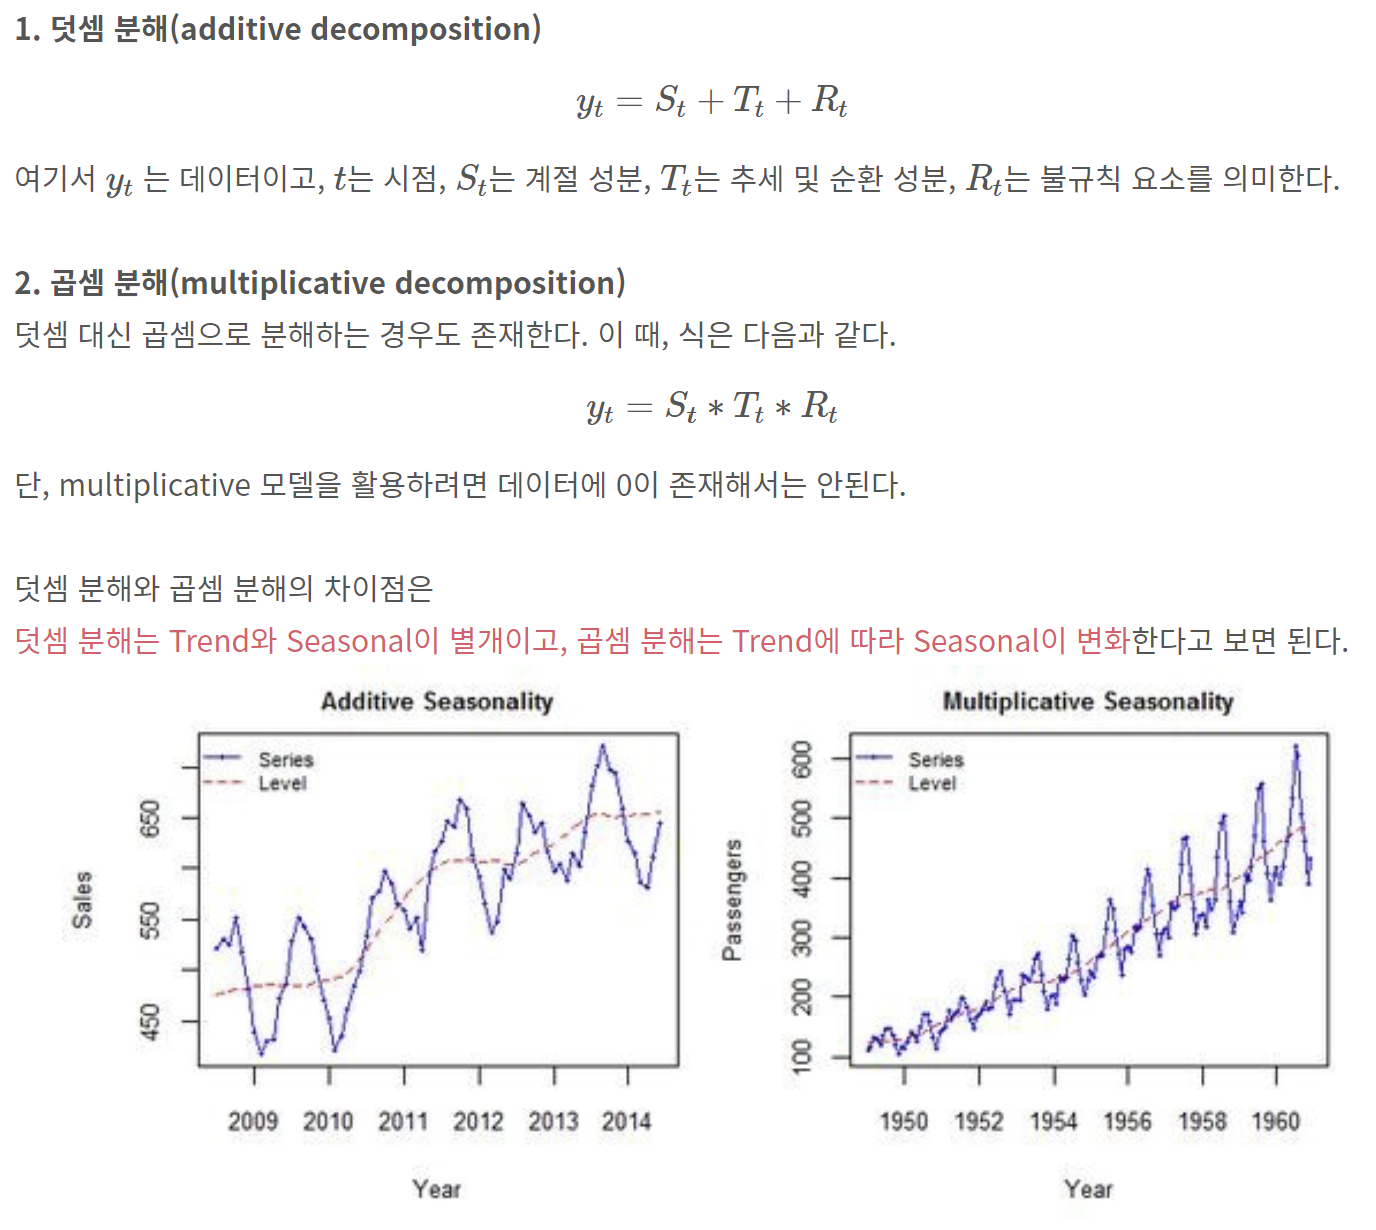 

첫번째 예시는 시간에 지남에 따라 변동폭이 일정하지만, 두번째 그림은 Trend가 상승함에 따라 변동폭 역시 증가하고 있다.
첫번째는 Additive가 적절하고, 주번째는 Multiplicative가 적절하다.

ARIMA 모형은 정상성을 가정하고 있다. 시간에 따라 변동폭이 일정하지 않을경우 정상성 가정을 만족하지 못함으로 로그 변환을 한다. 

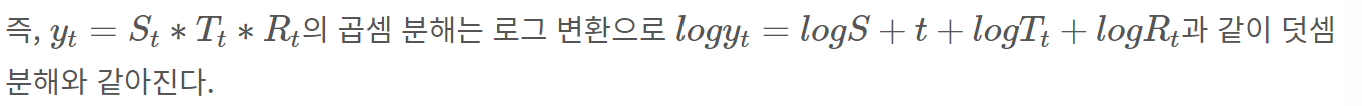

R에서는 stats 패키지 decompose()
Python에서는 statsmodels.tsa.seasonal 패키지의 seasonal_decompose()
에서 model = "additive" or "multiplicative"

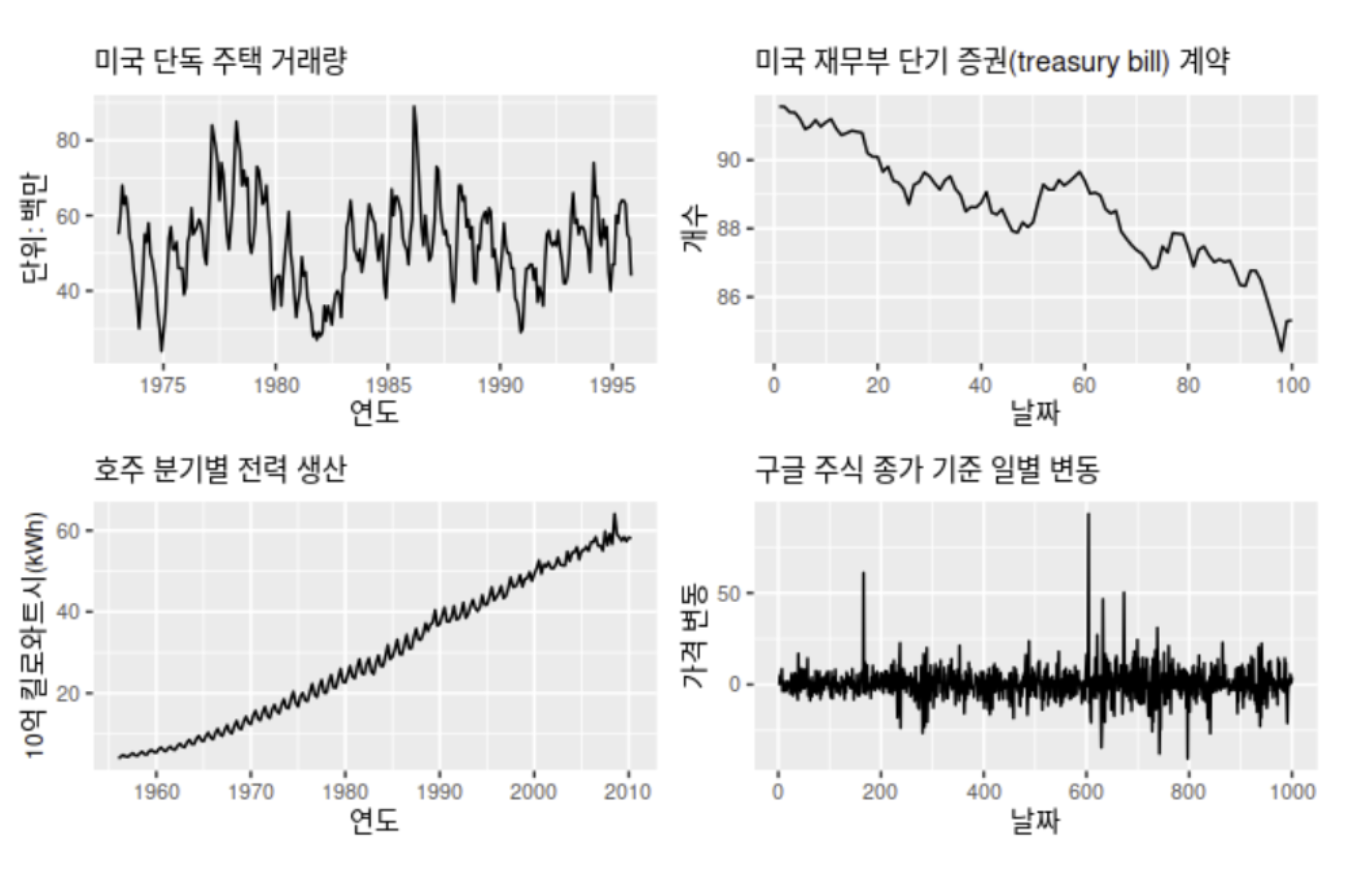

- 미국 단독 주택 거래량 경우 전체 기간에 걸쳐 분명한 추세는 없지만, 강한 계절성과 6~10년 주기의 패턴이 보인다
- 미국 재무부 단기 증권 계약의 경우 점진적으로 하향하는 추세가 보인다
- 호주 분기별 전력생산은 강한 계절성과 증가 추세가 보인다
- 구글 주식 종가 기준 일별 변동은 추세, 계절성, 주기적 패턴이 보이지않는다 

시계열 패턴에 따라 분석기법이 달라지기 때문에, 알고리즘 fitting 전에 EDA과정을 거쳐서 데이터의 특성을 파악하는게 먼저다. 



#### ARIMA 란?

Autoregressive Integrated Moving Average 로
AR(Autoregression) 모형과 MA(Moving Average) 모형을 합친 모형이다.

ARIMA모형은 시계열 데이터의 정상성(Stationary)를 가정하고 있으므로, 데이터의 정상성 여부를 확인하고, 정상성이아니라면 변환하여 모델적합해야한다.

#### 정상성이란?
평균, 분산이 시간에 따라 일정하며, 자기상관성이 없는 것이다. 
즉, 시계열 데이터의 특성이 시간 흐름에 따라 변하지 않음을 의미한다.

그래서, 추세, 계절성이 있는 시계열은 정상성을 지닌 데이터가 아니다.

정상성을 나타내지 않는 데이터는 복잡한 패턴을 모델링하기 어렵기 때문에, 정상성을 갖도록 로그변환, 차분등의 시계열 데이터 전처리가 필요하다.

#### 정상 시계열 변환
1. 변동폭이 일정하지 않은 경우 : 로그변환
2. 추세, 계절성이 존제하는 경우 : 차분
3. 1차 차분으로 정상성을 띄지 않으면, 차분을 반복한다

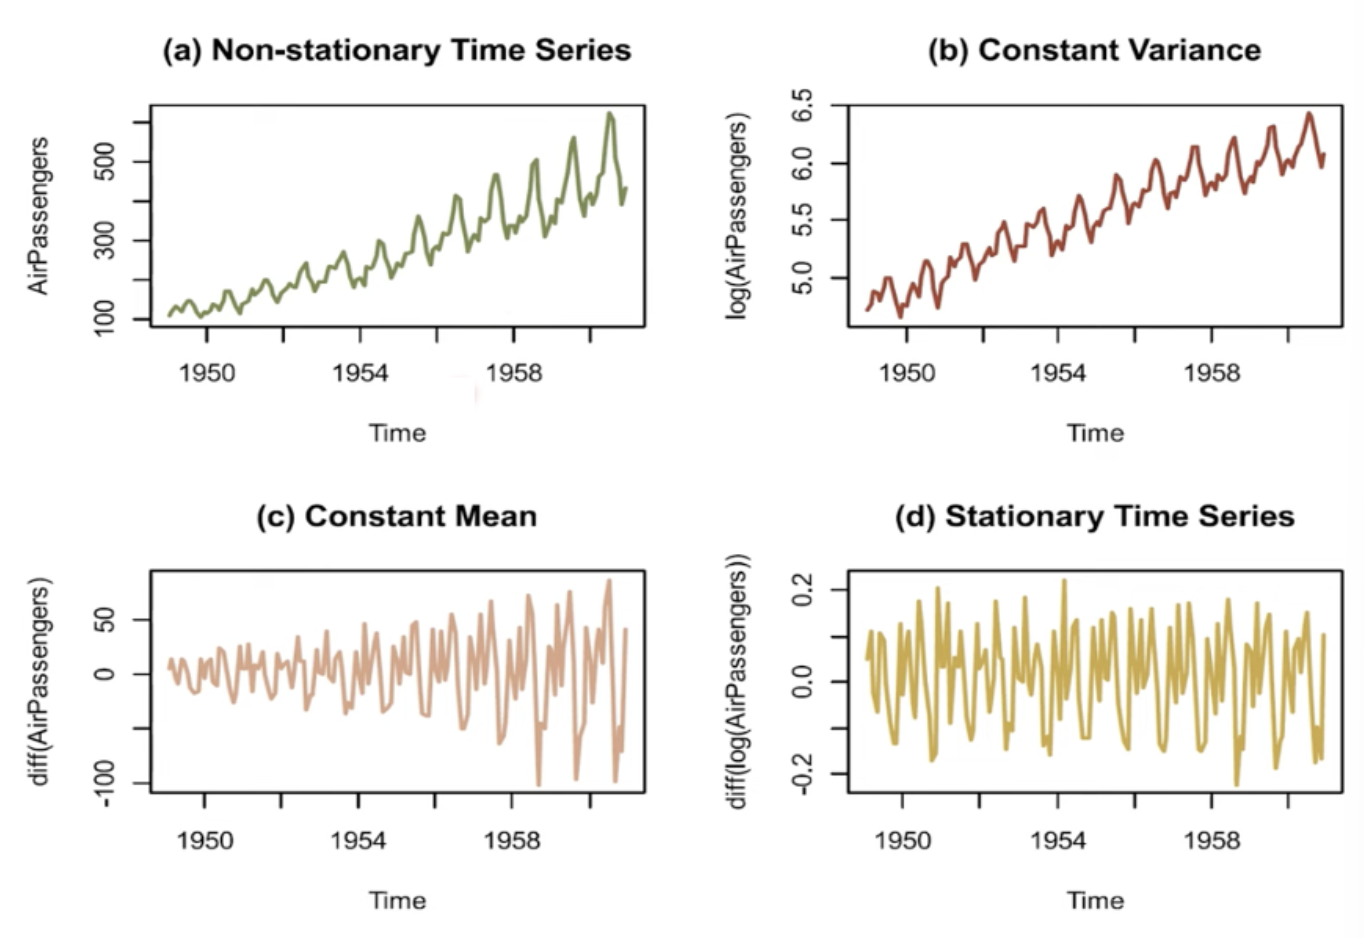 

즉, 시간에 따라 변동폭이 일정하지 않은 a 를 로그변환하면 b처럼 변동폭이 일정해진다.
추세가 있는 b를 차분을 하면 c처럼 처럼 평균이 일정한 시계열로 변환된다.
그래서, 변동폭이 일정하지않고, 추세가 있다면 로그변환가 차분을 함께하여 d처럼 정상시계열 데이터로 전처리한다.

#### AR 모형이란?
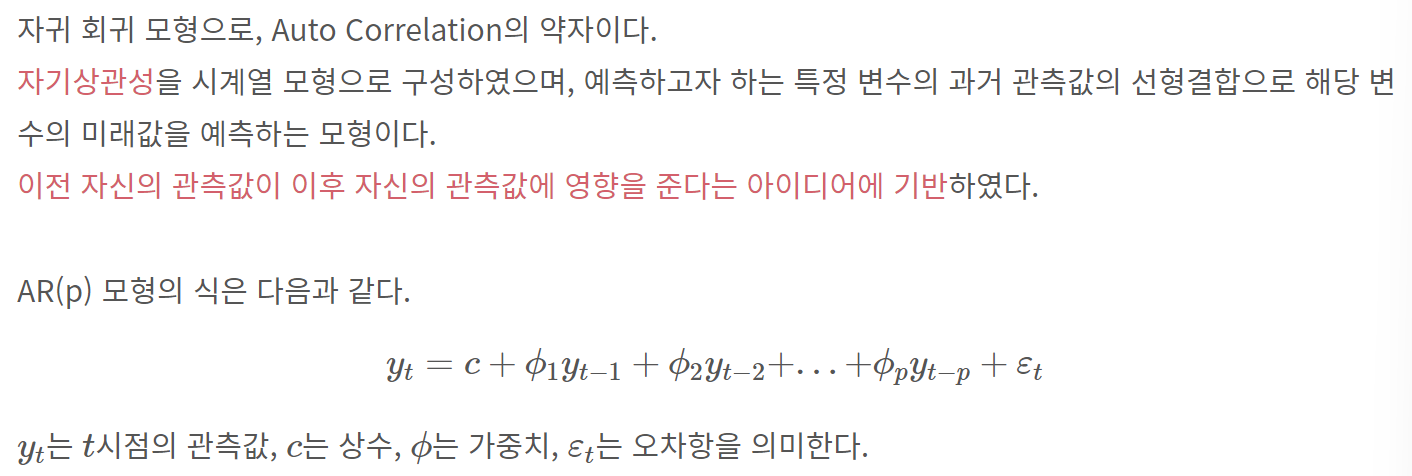

#### MA 모형이란?
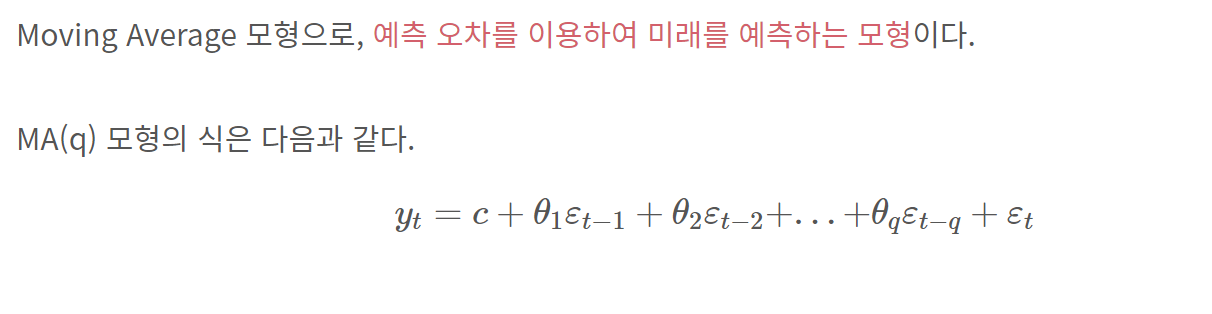

#### ARIMA 모형이란?
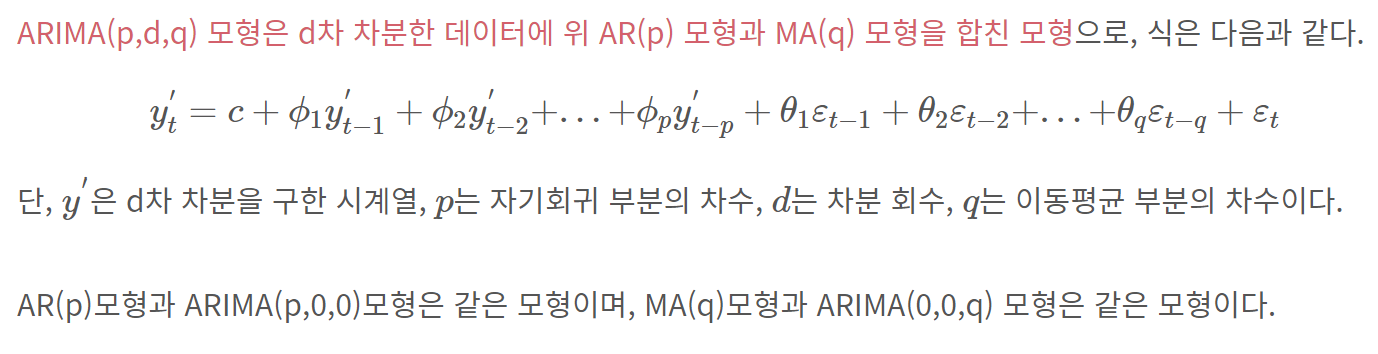

#### ACF(자기 상관함수, AutoCorrelation Function)이란?
시차에 따른 일련 자기상관을 의미한다. 시차가 거칠수록, ACF는 0에 가까워진다. 정상시계열은 상대적으로 빠르게 0에 수렴하며, 비정상 시계열은 천천히 감소하고 종종 큰 양의 값을 가진다. ACF는 일반 Correlation을 구하는 식과 동일하다, 대상이 yt, y_t-k 의 차이다

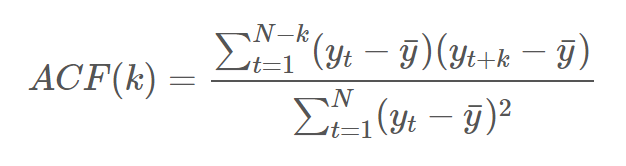

ACF는 정상성을 판단하는데 유용하다.
예로 구글 주식 가격에 대한 그래프다
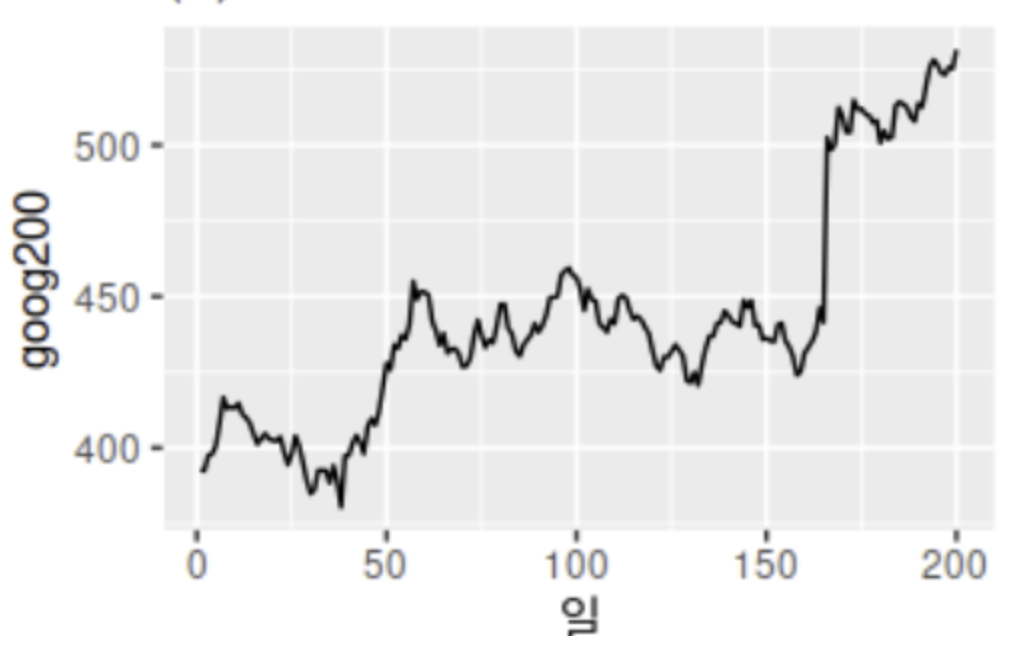

점진적 증가의 분명한 추세가 보인다. 해당데이터를 그대로 ACF그래프를 그리면 다음과 같다. 
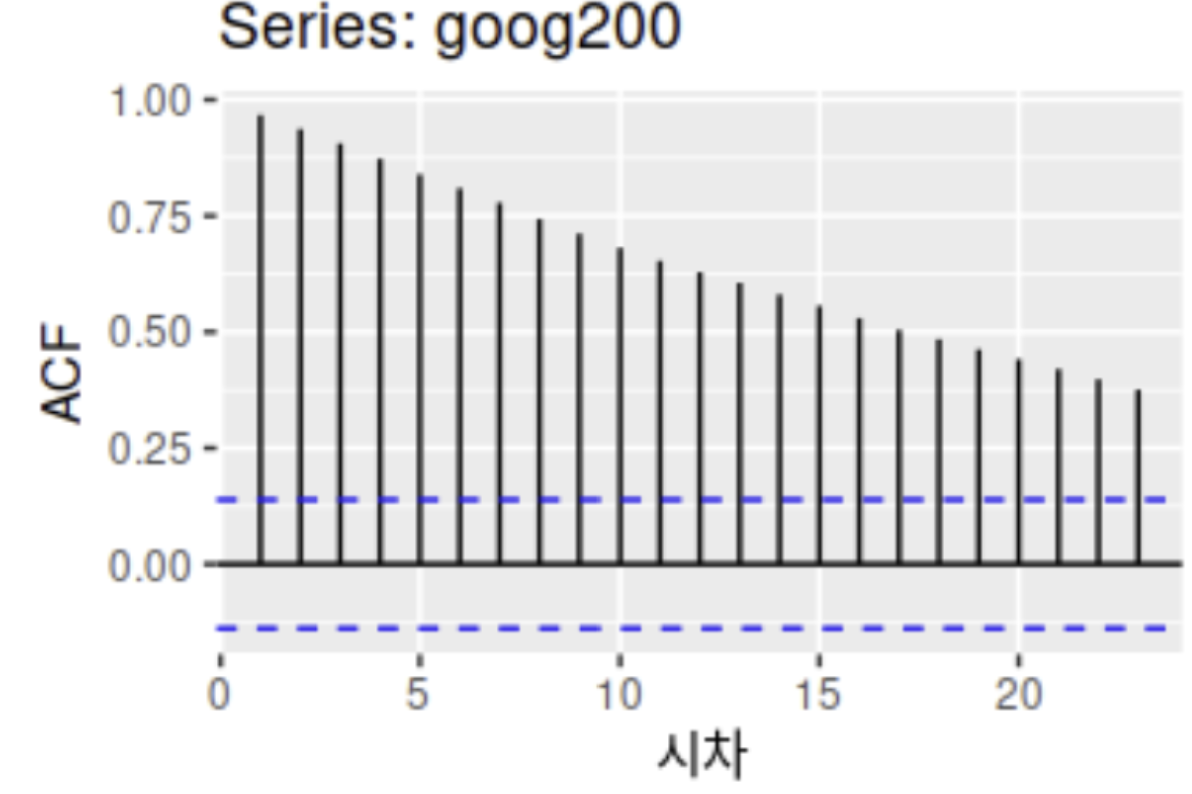
ACF가 아주 느리게 감소하는 것을 볼 수있다.

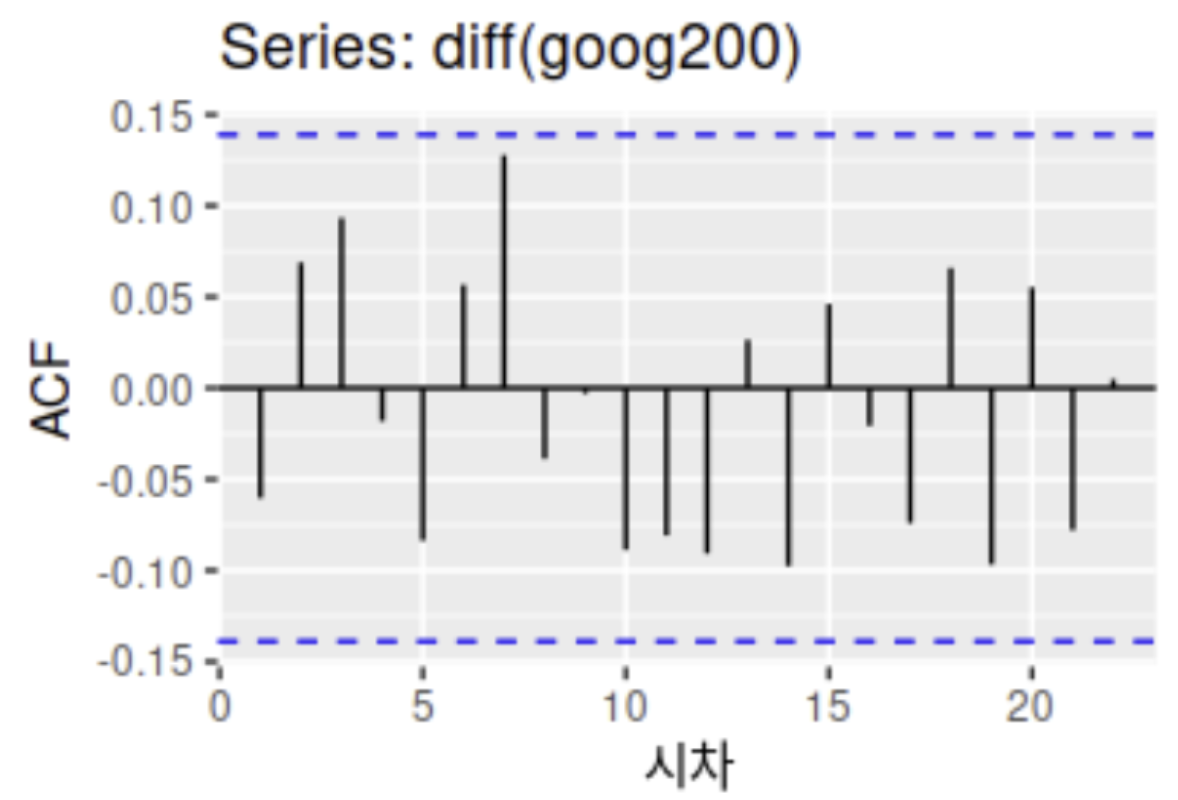

차분하여 정상시계열로 변환한다음 ACF를 그리면 다음과 같다.
파란색선이 신뢰구간인데, 해당 구간안에 들어오면 유의하지 않음을 얘기한다. Y축을 보면 ACF가 전 그래프에 비해 0에 가까우며, 빠르게 시간이 지날수록 0에 수렴하는 것을 확인가능하다. 


#### PACF(Partial Autocorrelation Function, 편자기상관함수)란?

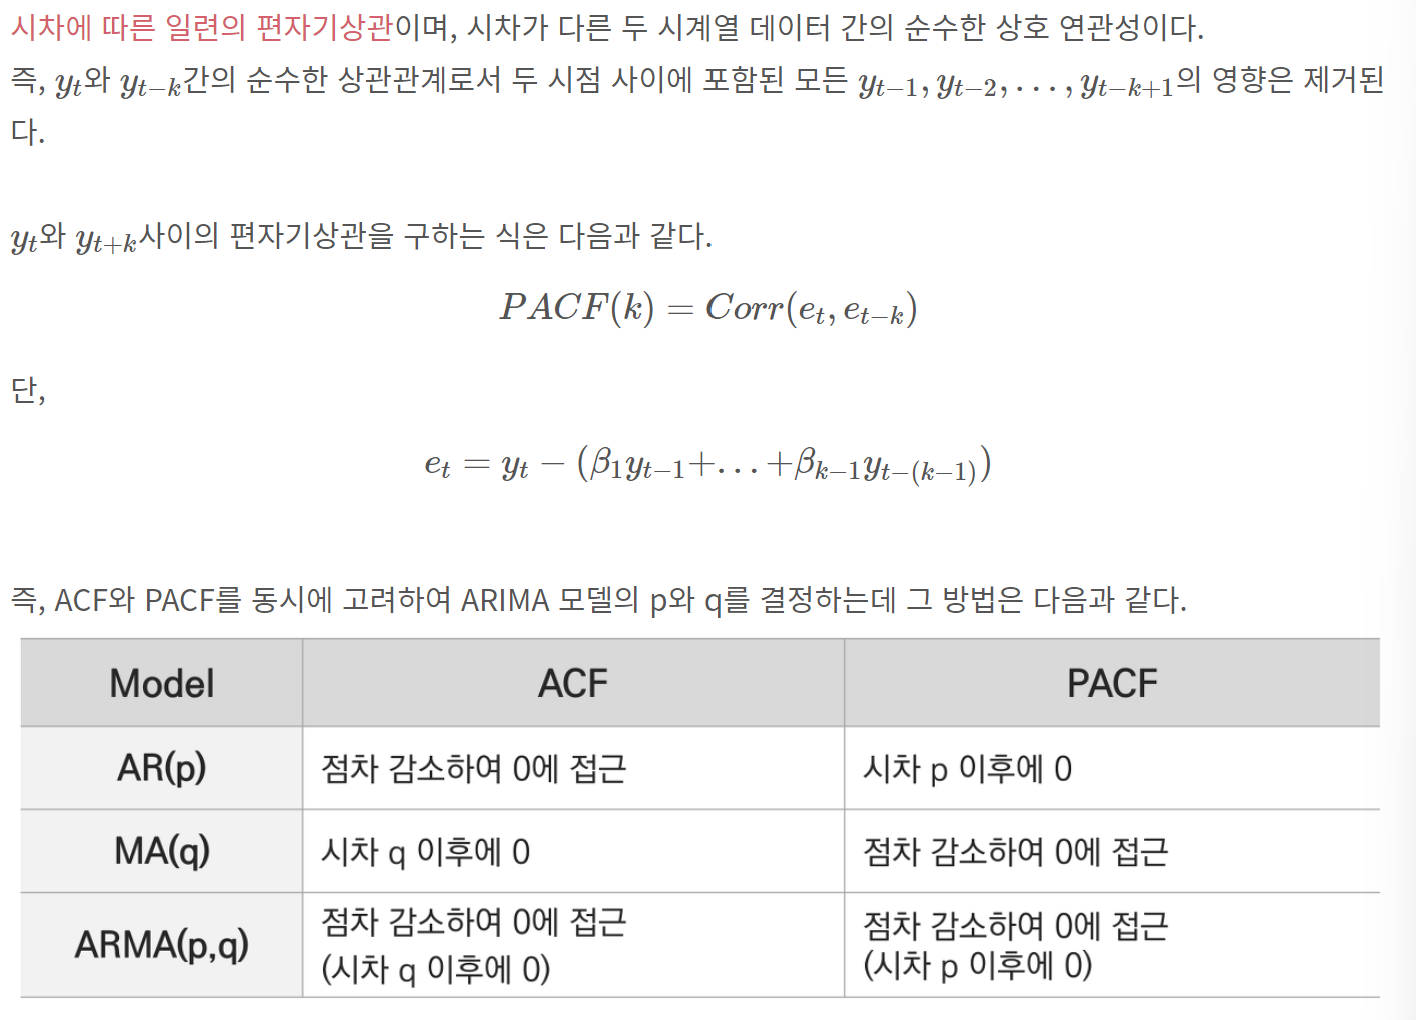

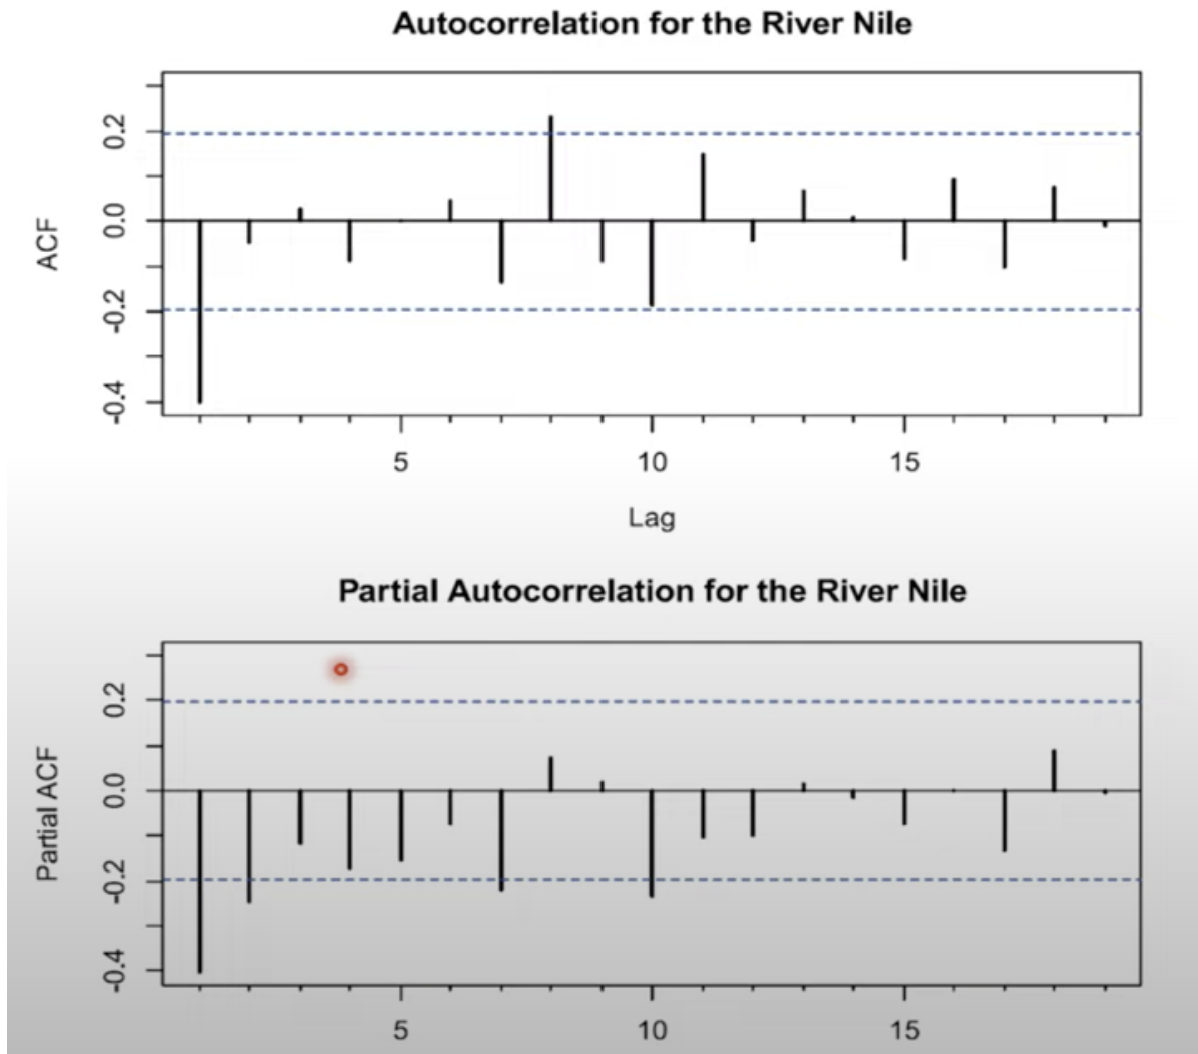
ACF 는 시차 1이후에 0에 가까워지고, PACF는 시차 2 이후에 0에 수렴한다.
ACF, PACF모두 0에 점진적으로 이른다. AR(2), MR(1), ARIMA(2,1)을 활용할 수 있다.

모델링을 마친다음에 잔차 ACF를 그려서, 제대로 적합하는지 확인한다. 정상성을 따르지 않으면, p,d,f파라미터를 재조정한다.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import chart_studio.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

In [7]:

weather = pd.read_csv("C:/Users/hylee/Downloads/archive/summary.csv")
weather_station = pd.read_csv("C:/Users/hylee/Downloads/archive/weather.csv")
weather_station = weather_station.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"]]
weather = weather.loc[:,["STA","Date","MeanTemp"]]

In [8]:
weather.head(5)

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444


In [9]:
weather_station.head(5)

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,36.716667,3.216667
3,33044,TELERGMA,AL,36.116667,6.416667
4,12001,TINDOUF,AL,27.683333,-8.083333


In [10]:
# BINDUKURI 지역에 대한 일평균 온도 대상 분석

weather_station_id = weather_station[weather_station.NAME == "BINDUKURI"].WBAN
weather_bin = weather[weather.STA == int(weather_station_id)]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])

In [11]:
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


일단 시계열 데이터를 시각화 해서 확인해본다

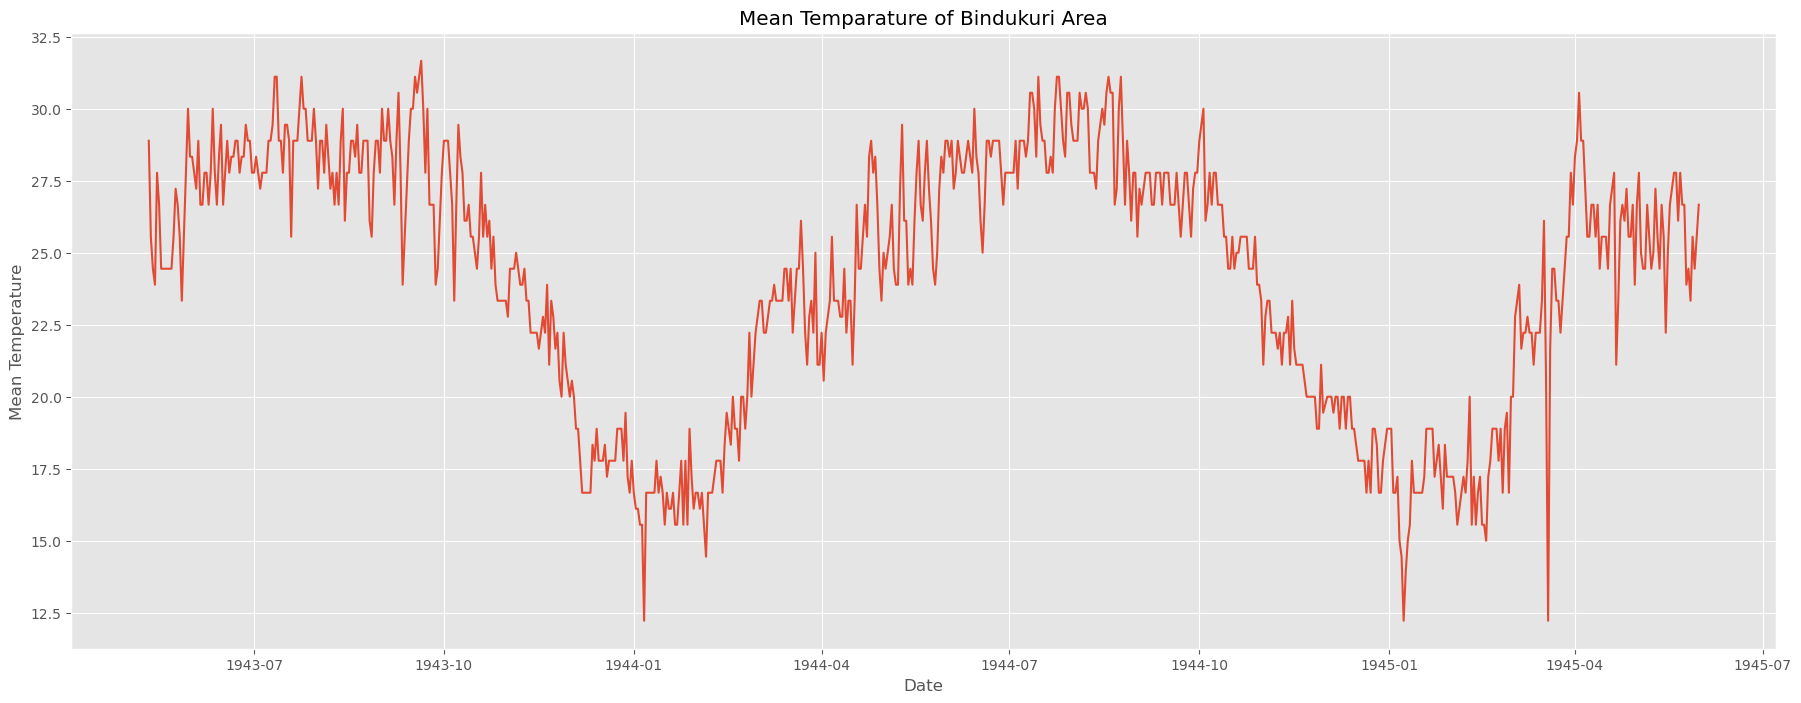

In [12]:
plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.title("Mean Temparature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

추세와 계절성이 보인다. 시계열 분해법으로 분해해본다.

In [13]:
timeseries = weather_bin.loc[:,["Date","MeanTemp"]]
timeseries.index = timeseries.Date
ts = timeseries.drop("Date",axis=1)

In [14]:
ts

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778
...,...
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['MeanTemp'], model='additive', freq = 7)

fig = plt.figure()
fig = result.plt()
fig.set_size_inches(20,15)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

freq는 계절성 주기를 기반으로 설정한다.
계절성 주기는 정답, 공식이 있는게 아니라 눈으로 보고 파악해야하는데
분기별 데이터 4, 월별 데이터 12, 주별 패턴이 있는 일별 데이터는 7로 설정하고 보면서 맞춰간다. 현재 데이터는 계절성 주기가 1년으로 보임으로 freq=365로 설정한다.

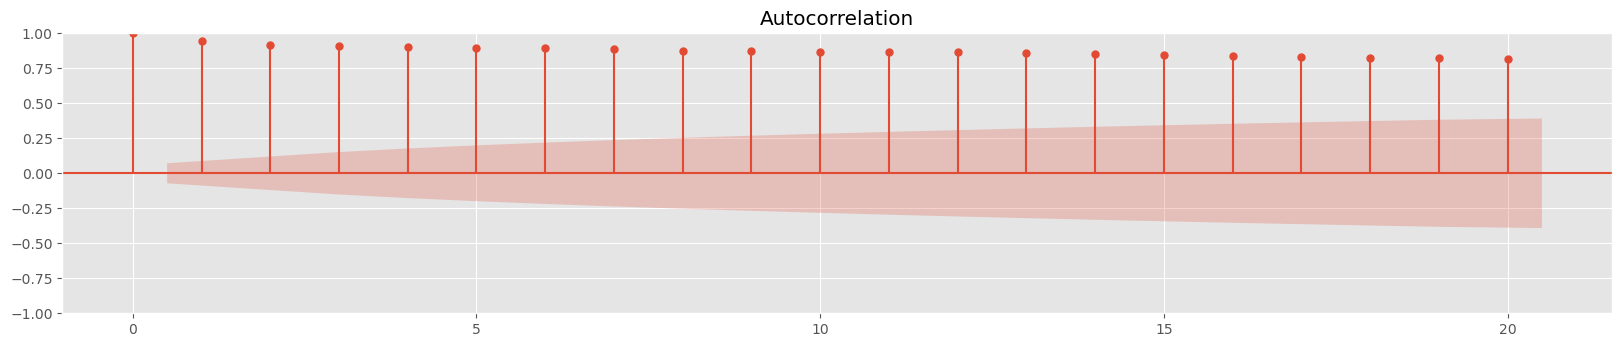

In [17]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20,ax=ax1)

#### ADF 검정
정상성을 만족하지 않는 것을 확인할 수 있다. 
ADF 검정으로 정상성을 확인한다.

귀무가설을 기각했을때 정상성을 만족한다.

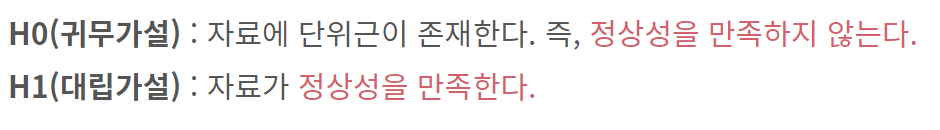

In [18]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print( 'ADF Statistics : %f' % result[0])

print( 'p-value : %f' % result[1])

print( 'Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key,value))

ADF Statistics : -1.409597
p-value : 0.577667
Critical Values
	1%: -3.439
	5%: -2.865
	10%: -2.569


p-val >0.05이고 그래프로도 정상성을 가지고 있지 않음을 확인했다. 이제 정상성 변환을 해야한다. 

#### 1차 차분하기
- ts_diff = ts - ts.shift()

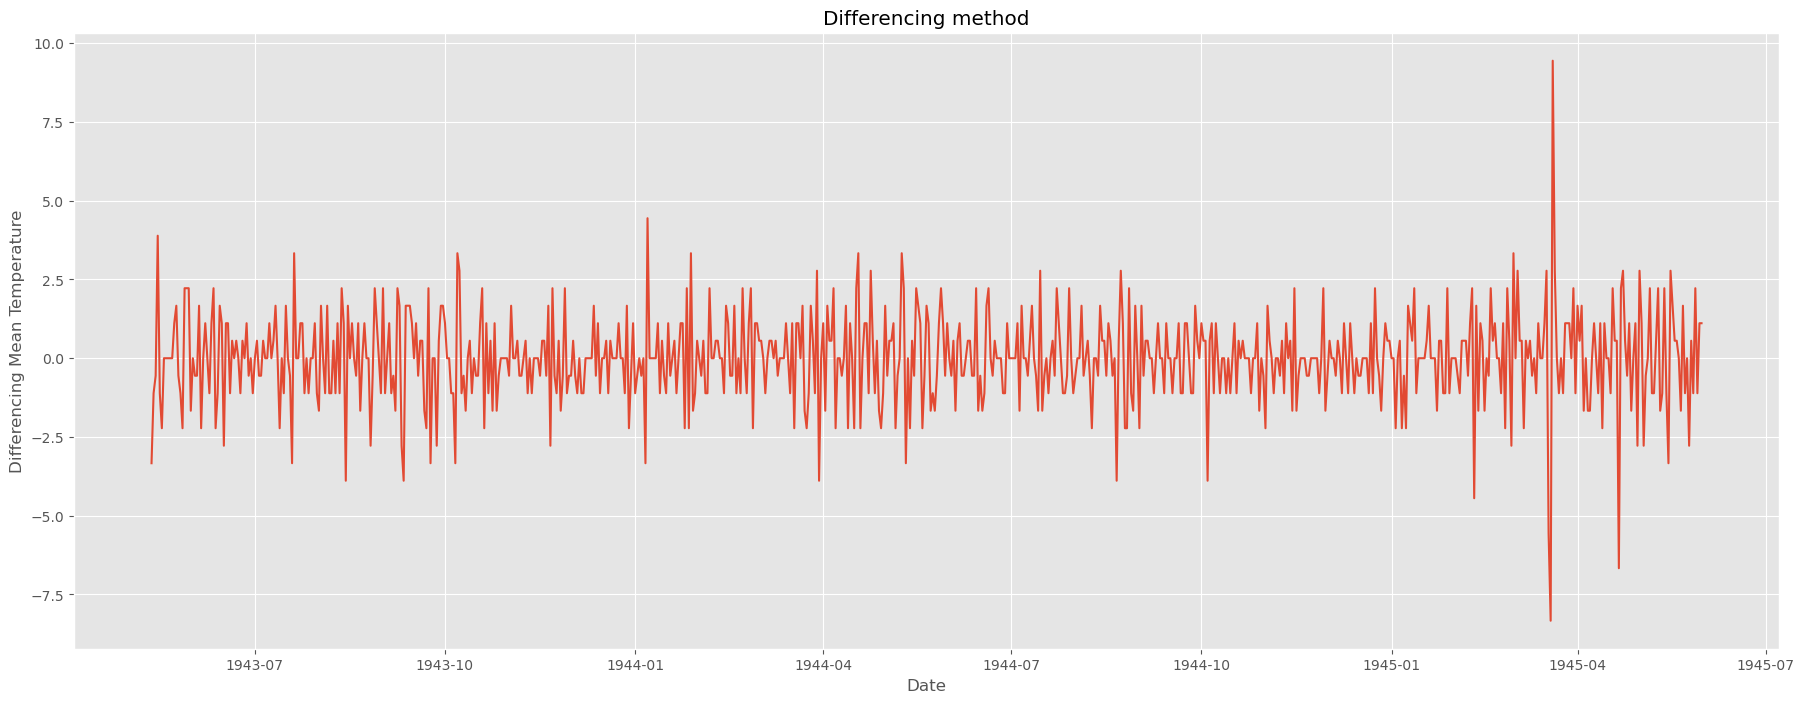

In [19]:
ts_diff = ts - ts.shift()

plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [22]:
result = adfuller(ts_diff[1:])

print( 'ADF Statistics : %f' % result[0])
print( 'p-value : %f' % result[1])
print( 'Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key,value))

ADF Statistics : -11.678956
p-value : 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


ADF 귀무가설을 기각한다. 1차 차분데이터는 정상성을 만족한다. ACF, PACF 그래프를 그려서 ARIMA모형의 p,q를 결정한다

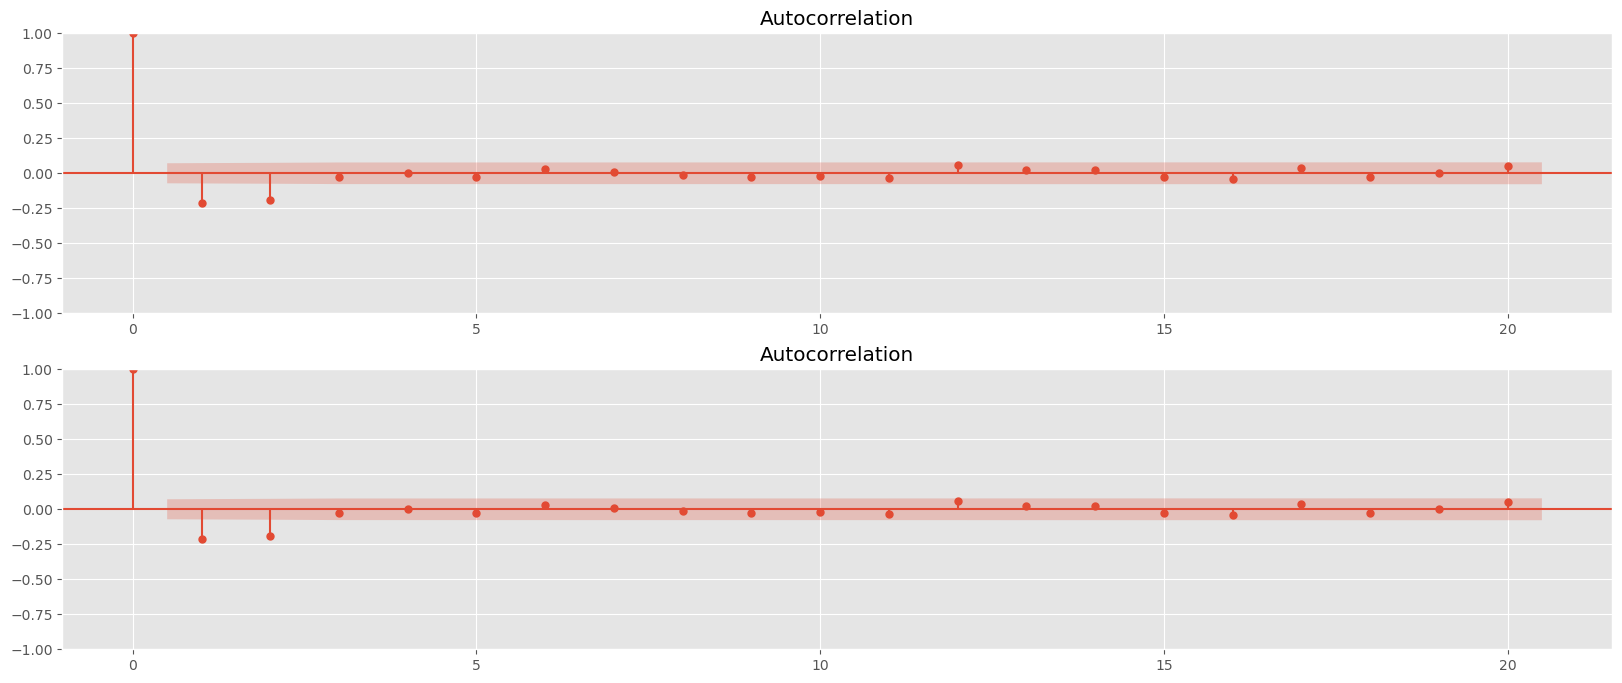

In [24]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags =20, ax= ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags =20, ax= ax2)

ACF, PACF 모두 0에 수렴하고, 모두 2번째 Lag이후 0에 수렴한다.
즉 ARIMA(2,1,2)모형을 Base로 (2,1,1) (1,1,2) (1,1,1) 등을 시도해 볼수 있다.

먼저 BASE model인 ARIMA(2,1,2)모델을 시행해본다

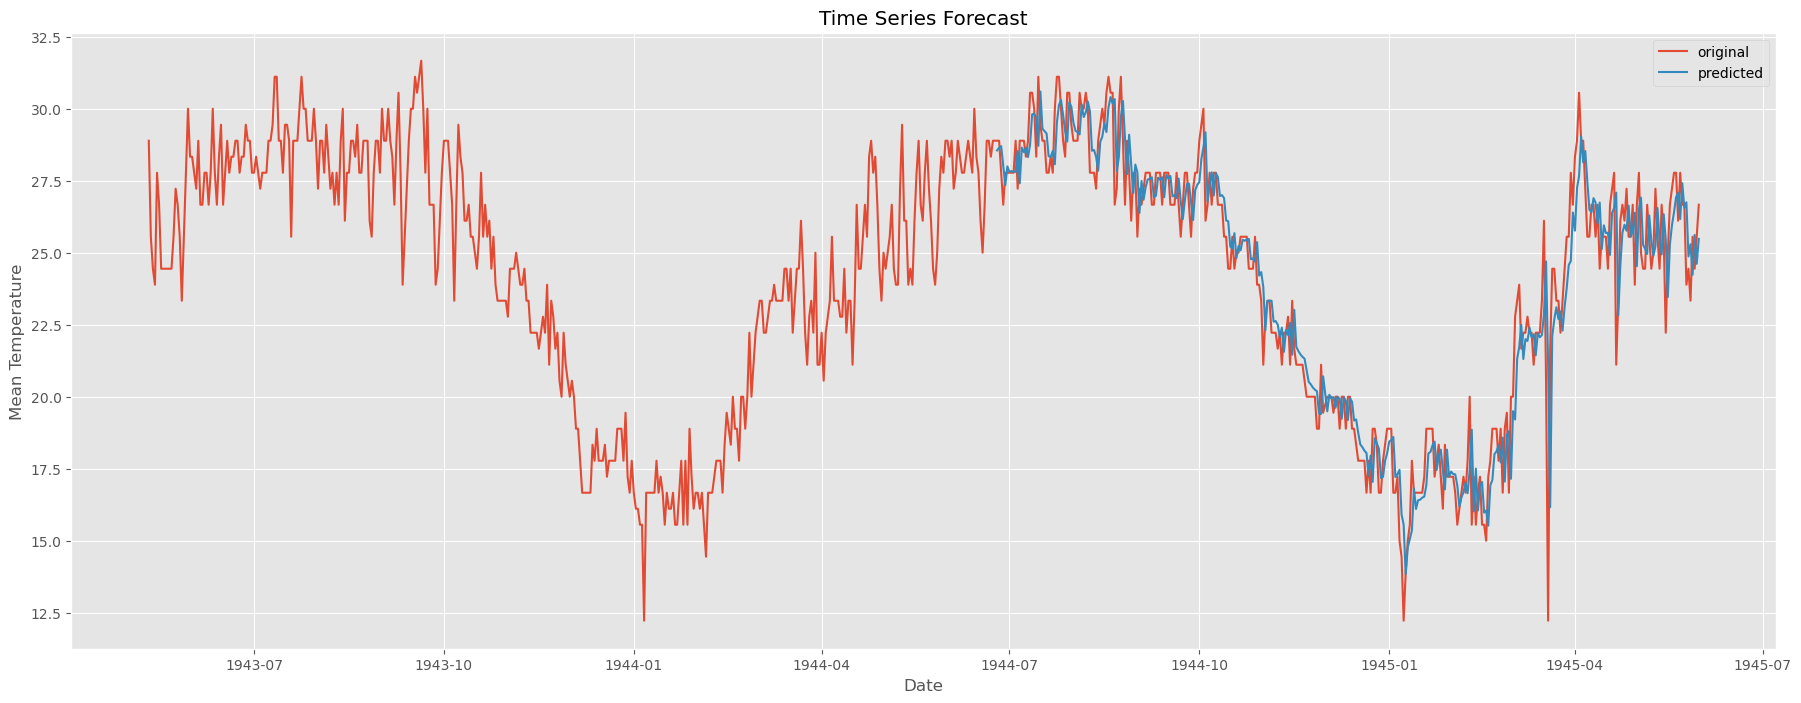

In [28]:
import statsmodels.api as sm
from pandas import datetime

model = sm.tsa.arima.ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

start_index = datetime(1944,6,25)
end_index = datetime(1945,5,31)

forecast = model_fit.predict(start=start_index, end= end_index, typ='levels')


plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date,weather_bin.MeanTemp, label = "original")
plt.plot(forecast, label="predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

눈으로 볼 때 결과가 좋아보인다. 마지막으로 잔차분석을 통해서 모델에 빠진것이 없는지 확인한다. 잔차분석시 잔차는 어떠한 패턴, 특성을 보여선한된다. 패턴이 있다는건 모델에 그만큼 덜 적용된 것이기 때문.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


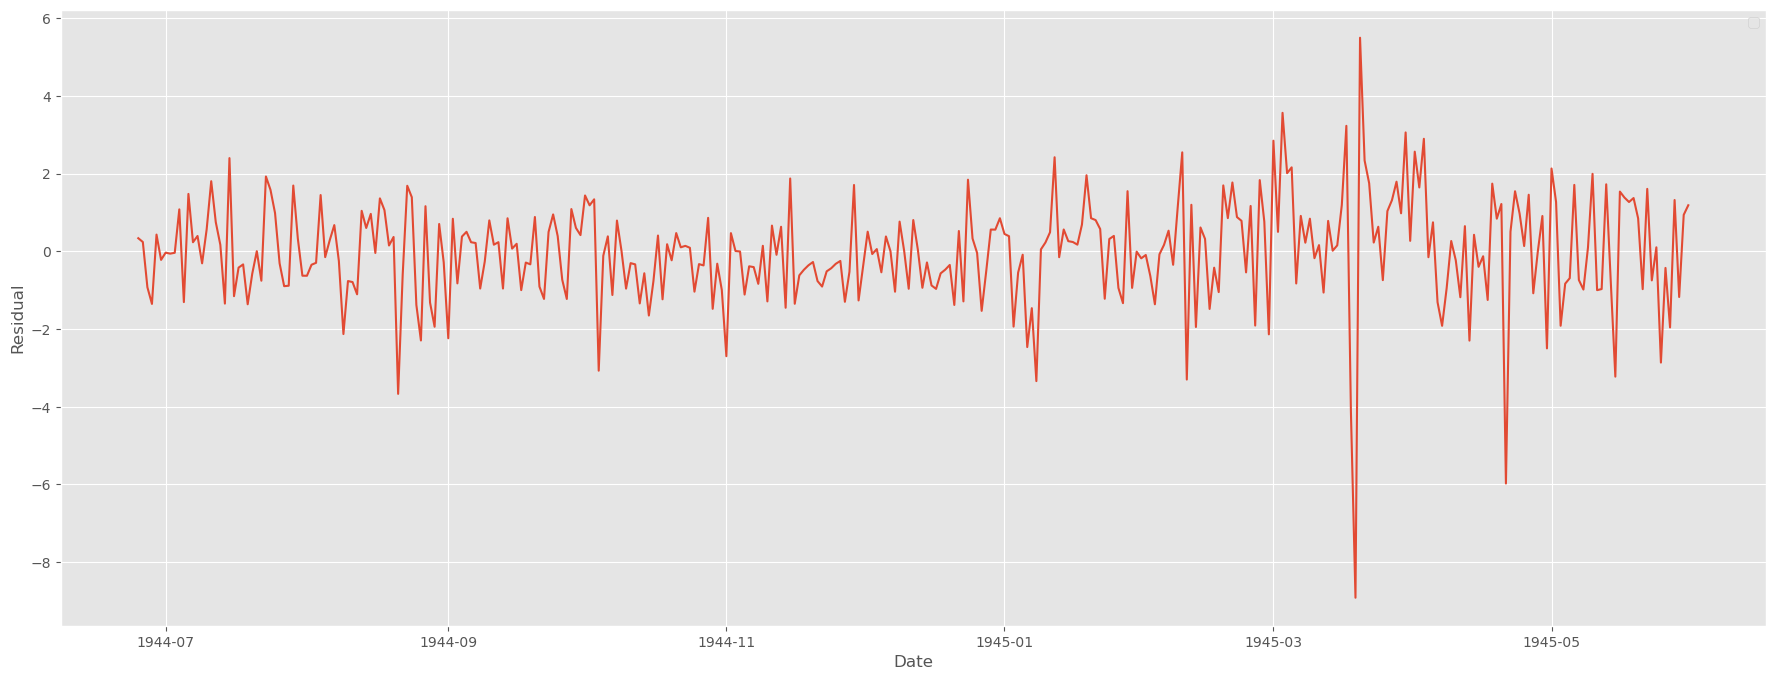

In [29]:
resi = np.array(weather_bin[weather_bin.Date>=start_index].MeanTemp) - np.array(forecast)

plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date[weather_bin.Date>=start_index],resi)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

ACF, ADF 검정을통해 잔차의 정상성도 판단한다.

In [31]:
plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi,lags=20,ax=ax1)

result = adfuller(resi)
print( 'ADF Statistics : %f' % result[0])
print( 'p-value : %f' % result[1])
print( 'Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key,value))

ADF Statistics : -18.629906
p-value : 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


<Figure size 2000x1000 with 0 Axes>

p-VALUE값이 매우 작게 나옴을 확인할 수 있다. ACF도 빠르게 0으로 수렴한다. 잔차또한 정상성을 만족함으로, 모델이 적합하게 피팅되었음을 알 수있다. 
마지막으로 모델의 성능을 확인한다

#### 모델 성능확인 

In [37]:
from sklearn import metrics

def scoring(y_true,y_pred):
    r2 = round(metrics.r2_score(y_true,y_pred)*100,3)
    corr= round(np.corrcoef(y_true,y_pred)[0,1],3)
    mape = round(metrics.mean_absolute_percentage_error(y_true,y_pred)*100,3)
    rmse = round(metrics.mean_squared_error(y_true,y_pred,squared=False),3)

    df = pd.DataFrame({
        'R2' : r2,
        "Corr" : corr,
        "RMSE" : rmse,
        "MAPE" : mape
    }, index=[0])

    return df

In [38]:
scoring(np.array(weather_bin[weather_bin.Date>=start_index].MeanTemp),np.array(forecast))

,R2,Corr,RMSE,MAPE
0,91.018,0.954,1.365,4.449
